Tarea 4 - Algoritmos de Aprendizaje no Supervisado 
Curso: Análisis de Datos
Fabio Ernesto Ortiz Otalora 



Curso: Análisis de Datos 

 Tutor: Handry Orozco 

Universidad Nacional Abierta y a Distancia (UNAD) 

ECBTI – Escuela de ciencias básicas tecnología e ingeniería  

Programa: Ingeniería de sistemas 

2024 

# Agrupamiento en Hierarchical Clustering

## Pasos de la Actividad

1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.  
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 
4. Entrenar el modelo configurando los diferentes hiperparámetros. 
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc. 
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo 
7. Interpretar, analizar y documentar los resultados obtenidos.
8. Cargar en GitHub los códigos de los modelos diseñados https://github.com/ 
 

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.  

In [8]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones


# librerías de para implementar modelo Kmeans
from sklearn.cluster import AgglomerativeClustering #algoritmos de agrupamiento o clustering, dividir datos en grupos o clusters basados en su similitud.
from sklearn.preprocessing import StandardScaler #escalar o normalizar los datos 
from scipy.cluster.hierarchy import linkage, dendrogram #herramientas para realizar agrupamiento jerárquico y visualización de dendrogramas.
#dendrogram:  genera un gráfico de árbol 

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from datetime import datetime

#Librería para evitar la advertencia de que el modelo tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [10]:
Datos = pd.read_csv('C:\\Users\\fabio\\OneDrive\\ING SISTEMAS\\6.2 ANALISIS DE DATOS\\TAREA 4\\Mall_Customers.csv')

In [12]:
Datos.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [13]:
# Obtener información sobre el tipo de datos y el total de valores en cada columna
print(Datos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Explicación del resultado:

Tipo de Datos (<class 'pandas.core.frame.DataFrame'>): Este objeto es un DataFrame de Pandas, que representa una tabla de datos en la que las filas y columnas están indexadas. Es similar a una hoja de cálculo en la que puedes analizar y manipular datos estructurados.

RangeIndex: 200 entries, 0 to 199: El índice del DataFrame tiene 200 filas numeradas desde 0 hasta 199, lo que indica que el conjunto de datos contiene información sobre 200 clientes.

Data columns (total 5 columns): Este DataFrame tiene cinco columnas que contienen los diferentes atributos de cada cliente:

CustomerID: Un identificador único para cada cliente. Contiene 200 valores no nulos de tipo entero (int64).
Gender: Es una variable categórica que indica el género del cliente, con valores de tipo object (cadena de texto). También tiene 200 valores no nulos.
Age: Representa la edad de cada cliente en años y es de tipo int64.
Annual Income (k$): Muestra el ingreso anual del cliente en miles de dólares y también es de tipo int64.
Spending Score (1-100): Es una puntuación de gasto (de 1 a 100) que representa los hábitos de gasto del cliente en función de factores como comportamiento y poder adquisitivo, y es de tipo int64.
Non-Null Count: Todas las columnas tienen 200 valores no nulos, lo que indica que no hay datos faltantes en este conjunto de datos para ninguna de las variables.

Dtype: La mayoría de las columnas son del tipo int64, lo que significa que contienen datos numéricos enteros. La columna Gender es de tipo object, ya que contiene valores de texto.

Memory usage: 7.9+ KB: El DataFrame ocupa alrededor de 7.9 KB en memoria, lo cual es un tamaño pequeño y permite un análisis eficiente en memoria sin requerir mucha capacidad de procesamiento.

Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos Spending Score (1-100)')

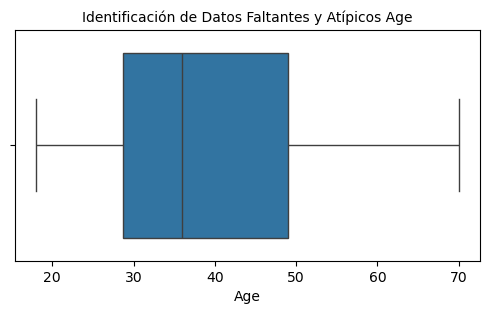

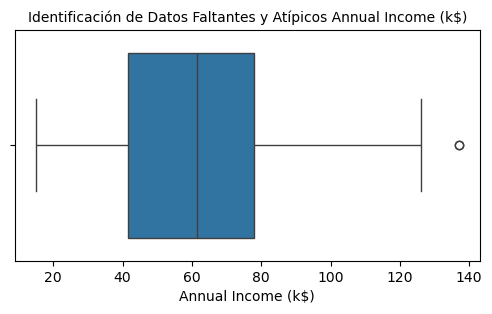

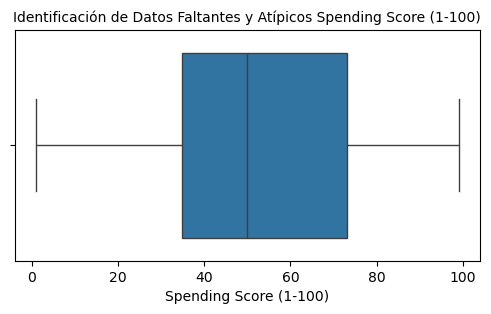

In [22]:
#Identificación de Datos Faltantes y Atípicos variable Age
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Faltantes y Atípicos Age', fontsize=10 )

#Identificación de Datos Faltantes y Atípicos variable Annual Income (k$) 
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos Annual Income (k$)', fontsize=10 )

#Identificación de Datos Faltantes y Atípicos variable Spending Score (1-100) 
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Faltantes y Atípicos Spending Score (1-100)', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [24]:
# Identificar columnas con datos faltantes
print(Datos.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Para este Dataset no contamos con valores faltantes en ninguna de sus columnas.

Text(0.5, 1.0, 'Identificación de Datos Atípicos Annual Income (k$)')

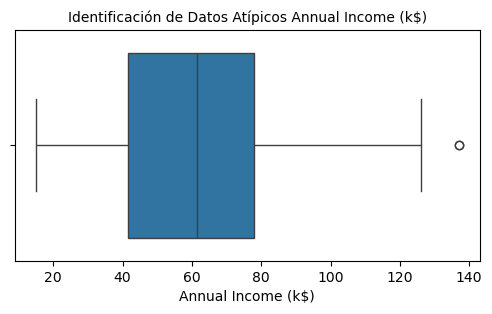

In [30]:
#Identificación de Datos Atípicos variable Annual Income (k$) 
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Atípicos Annual Income (k$)', fontsize=10 )

In [28]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Annual Income (k$)']<nivel_minimo)|(Datos['Annual Income (k$)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 14


In [32]:
# Filtra Datos Atípicos

Datosr=Datos[(Datos['Annual Income (k$)']<nivel_maximo)&(Datos['Annual Income (k$)']>nivel_minimo)]

In [34]:
#Revisión del tipo de datos y datos faltantes

Datosr.info()

<class 'pandas.core.frame.DataFrame'>
Index: 186 entries, 0 to 185
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              186 non-null    int64 
 1   Gender                  186 non-null    object
 2   Age                     186 non-null    int64 
 3   Annual Income (k$)      186 non-null    int64 
 4   Spending Score (1-100)  186 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 8.7+ KB


### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Para seleccionar las características más relevantes del dataset Mall Costumers para entrenar un modelo de Hierarchical Clustering, es importante entender cuáles variables pueden realizar segmentación de clientes.

- Aspectos demográficos
- comportamientos de compra

1. Las características demográficas brindan información sobre el perfil básico de los clientes:
   
- Gender: El genero de los consumidores puede influir en sus patrones de compra y preferencias.
- Age: La edad del cliente puede influir en sus patrones de compra y preferencias.
- Annual Income: El ingreso anual del cliente puede ayudar a segmentar en función de la capacidad de gasto.

2. Selección de características de comportamiento de compra Estas características se enfocan en cómo los clientes interactúan con la empresa en términos de frecuencia y volumen de gasto:

- Spending Score: Cantidad total gastada por el cliente en un periodo determinado, identificar clientes de alto valor.

In [37]:
# Revisión de los datos de las variables objetivo
Datosr.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [43]:
# Filtrar columnas del modelo 

Datosrf = Datosr[["Age","Gender","Annual Income (k$)","Spending Score (1-100)"]]

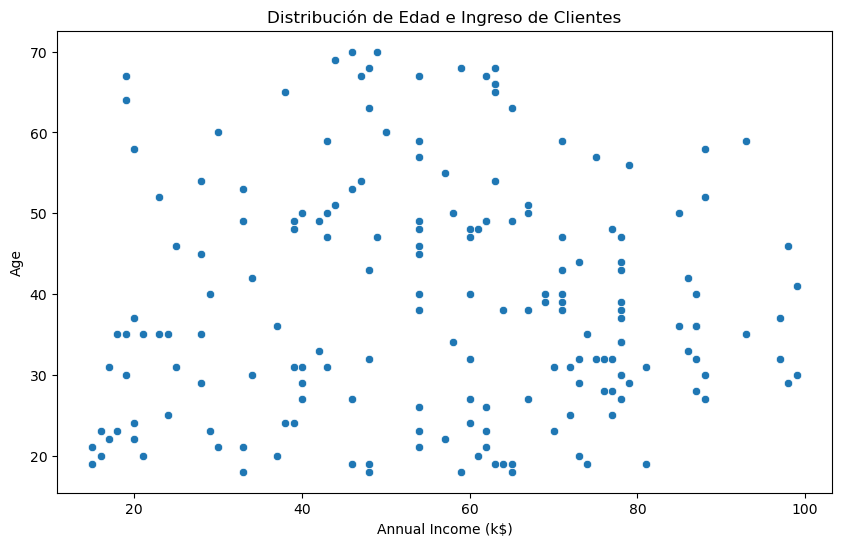

In [45]:
# Grafica antes del agrupamiento

plt.figure(figsize=(10, 6))
sns.scatterplot(x=Datosrf['Annual Income (k$)'], y=Datosrf['Age'])
plt.title('Distribución de Edad e Ingreso de Clientes')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Age')
plt.show()

### 4. Entrenar el modelo configurando los diferentes hiperparámetros

Preparación de los Datos Para aplicar el modelo de clustering jerárquico, es recomendable estandarizar los datos si contienen diferentes escalas. Esto se hace con el StandardScaler de scikit-learn, que centra los datos alrededor de 0 y les da una desviación estándar de 1:

In [51]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datosrf[['Age','Annual Income (k$)','Spending Score (1-100)']])

Visualización del Dendrograma Antes de aplicar el modelo, es común visualizar el dendrograma para tener una idea de cómo se agruparán los datos. Esto se puede hacer con la función linkage de SciPy y dendrogram para mostrar el árbol de agrupamiento.

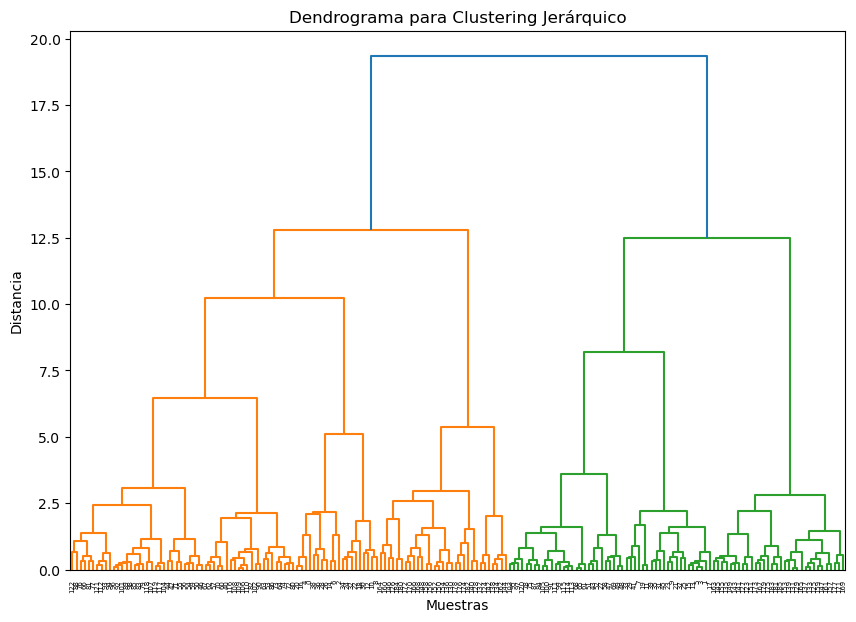

In [53]:
# Check for and handle non-finite values in scaled_data
scaled_data = np.nan_to_num(scaled_data)  # Reemplaza valores NaN, inf y -inf con valores finitos

# Continue with hierarchical clustering
linked = linkage(scaled_data, method='ward') # Realiza el enlace jerárquico con el método de Ward

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False) # Dibuja el dendrograma
plt.title('Dendrograma para Clustering Jerárquico')
plt.xlabel('Muestras')
plt.ylabel('Distancia')
plt.show()

En este gráfico, cada fusión (cada rama que se une) representa la combinación de dos clústeres o muestras. Las ramas largas indican que las muestras o clústeres que se están uniendo tienen gran disimilitud, mientras que las ramas cortas indican que los elementos fusionados son muy similares. En función de la distancia en el eje Y, puedes determinar cuántos clústeres deseas extraer del análisis de agrupamiento, ya que el corte en el dendrograma a una cierta altura te dará el número de grupos a conservar.

### 5.Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.

In [59]:
Datosrf[['Age','Annual Income (k$)','Spending Score (1-100)']] = Datosrf[['Age','Annual Income (k$)','Spending Score (1-100)']].fillna(Datosrf[['Age','Annual Income (k$)','Spending Score (1-100)']].mean())

# Preprocesamiento de los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Datosrf[['Age','Annual Income (k$)','Spending Score (1-100)',]])  

# Entrenamiento del modelo de Clustering Jerárquico
model = AgglomerativeClustering(n_clusters=3, linkage='ward')  
labels = model.fit_predict(scaled_data)

# Evaluación del modelo

# Coeficiente de Silhouette
sil_score = silhouette_score(scaled_data, labels)
print(f"Coeficiente de Silhouette: {sil_score}")

# Índice de Calinski-Harabasz
ch_score = calinski_harabasz_score(scaled_data, labels)
print(f"Índice de Calinski-Harabasz: {ch_score}")

# Índice de Davies-Bouldin
db_score = davies_bouldin_score(scaled_data, labels)
print(f"Índice de Davies-Bouldin: {db_score}")

Coeficiente de Silhouette: 0.33213815748086906
Índice de Calinski-Harabasz: 84.90139875046562
Índice de Davies-Bouldin: 1.1305024940373656


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Gráfico de Dispersión para Visualización de Clusters

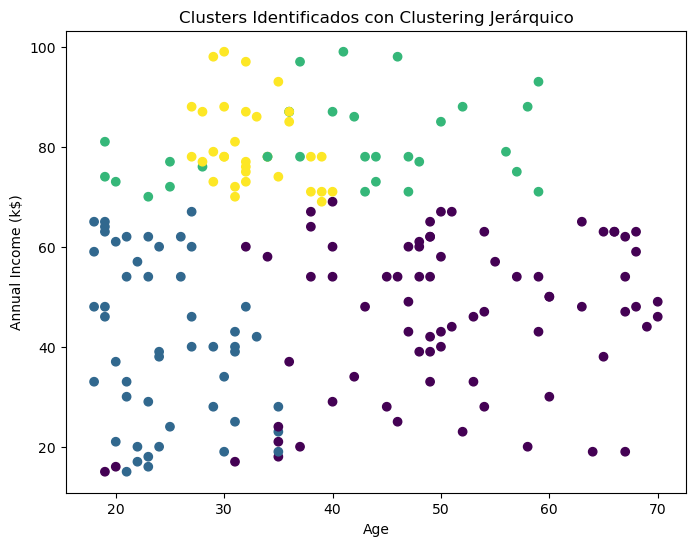

In [61]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Aplicar el modelo de clustering jerárquico
model = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
Datosrf['Cluster'] = model.fit_predict(scaled_data)
# Graficar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(Datosrf['Age'], Datosrf['Annual Income (k$)'], c=Datosrf['Cluster'], cmap='viridis')
plt.title('Clusters Identificados con Clustering Jerárquico')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.show()

Gráfico de Silueta
Este gráfico muestra cuán similar es cada punto a su propio grupo en comparación con otros grupos. Un valor alto (cercano a 1) indica que los puntos están bien agrupados, mientras que un valor bajo (cercano a -1) indica que están mal asignados.

Silhouette Score: 0.384942917114684


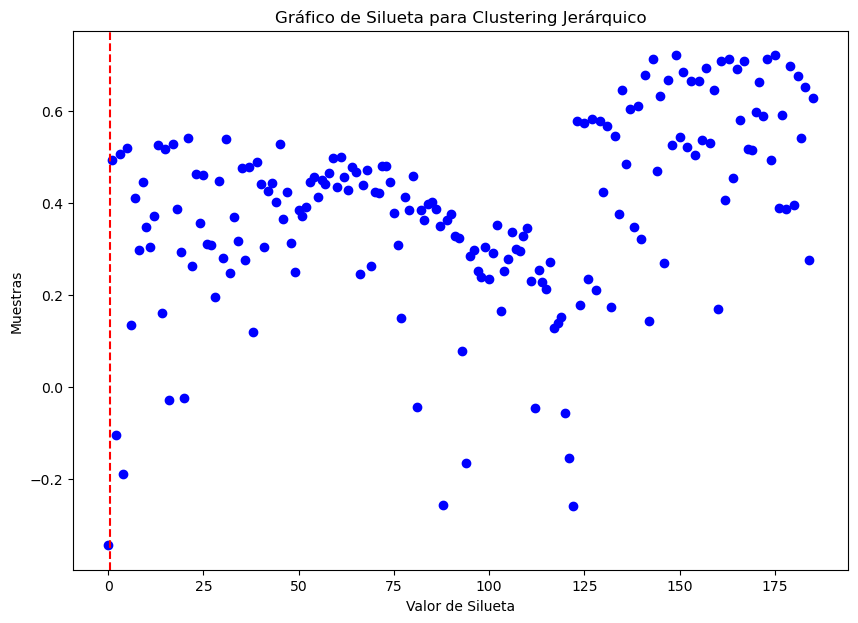

In [63]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

# Calcular la silueta
silhouette_avg = silhouette_score(scaled_data, model.labels_)
print(f'Silhouette Score: {silhouette_avg}')

# Mostrar el gráfico de silueta
sample_silhouette_values = silhouette_samples(scaled_data, model.labels_)
fig, ax = plt.subplots(figsize=(10, 7))

ax.plot(sample_silhouette_values, 'bo')
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_title("Gráfico de Silueta para Clustering Jerárquico")
ax.set_xlabel("Valor de Silueta")
ax.set_ylabel("Muestras")
plt.show()

Interpretación: El valor de la silueta ayuda a medir la calidad del clustering. Un valor cercano a +1 indica una buena asignación de los puntos a los clusters, mientras que valores cercanos a -1 indican que los puntos podrían estar mal clasificados.

### 7. Interpretar, analizar y documentar los resultados obtenidos

Edad del Cliente y Comportamiento de Compra:

La edad es un factor fundamental en la segmentación de clientes. Generalmente, los clientes más jóvenes pueden tener una mayor interacción con ciertos productos o servicios, mientras que los clientes de mayor edad suelen mostrar una preferencia por la estabilidad y el valor. Agrupar a los clientes en función de su edad permite identificar posibles tendencias en sus patrones de gasto y preferencias.

Coeficiente de Silhouette: 0.3321: Un coeficiente de silueta de 0.3321 indica que la separación entre algunos clusters es moderada. Aunque no alcanza valores elevados (que suelen estar cerca de +1), este valor sugiere una cohesión relativa dentro de ciertos clusters y, a su vez, una cierta superposición entre otros. Esto indica que hay grupos de clientes con características algo similares, pero sin una separación completamente nítida entre todos los segmentos.

Índice de Calinski-Harabasz: 84.90: El índice de Calinski-Harabasz obtenido es de 84.90, lo cual es relativamente bajo en comparación con umbrales considerados altos (normalmente superiores a 500). Este índice mide la relación entre la dispersión dentro de los clusters y la separación entre ellos. Un valor bajo sugiere que, aunque hay algún grado de cohesión interna, los clusters no están claramente separados entre sí. Esto podría indicar que los patrones de compra, ingresos y edad de los clientes presentan solapamientos significativos que dificultan una segmentación precisa.

Índice de Davies-Bouldin: 1.1305: El índice de Davies-Bouldin de 1.1305 indica una moderada dispersión y solapamiento entre clusters. Este índice evalúa la relación entre la distancia media dentro de los clusters y la distancia entre clusters. Valores cercanos a 0 son deseables, ya que indican mejor separación entre clusters. En este caso, el valor obtenido indica que los clusters tienen cierta dispersión y no están completamente bien separados, aunque no llegan a solaparse de forma excesiva. Este valor podría sugerir que los segmentos de clientes comparten algunas características y que podrían haber subgrupos que se comportan de forma similar dentro de ciertos clusters.

Puntaje de Silueta General: 0.3849: El puntaje de silueta general de 0.3849 respalda la interpretación de una separación moderada entre clusters. Un valor por debajo de 0.5 indica que algunos puntos podrían no estar perfectamente asignados a sus respectivos clusters o que hay superposición en algunos grupos. Esto sugiere que ciertos segmentos de clientes presentan comportamientos similares, dificultando la creación de segmentos bien definidos.


### 8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados